<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/attrition.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [9]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [10]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/Attrition_simple2.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [12]:
# 데이터 살펴보기
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


**데이터 설명**

- Attrition: 이직 여부 (1: 이직, 0: 잔류)
- Age: 나이
- DistanceFromHome: 집-직장 거리 (단위: 마일)
- EmployeeNumber: 사번
- Gender: 성별 (Male, Female)
- JobSatisfaction: 직무 만족도(1: Low, 2: Medium, 3: High, 4: Very High)
- MaritalStatus: 결혼 상태 (Single, Married, Divorced)
- MonthlyIncome: 월급 (단위: 달러)
- OverTime: 야근 여부 (Yes, No)
- PercentSalaryHike: 전년 대비 급여 인상율(단위: %)
- TotalWorkingYears: 총 경력 연수

In [14]:
# 기술통계 확인
data.describe()

,Attrition,Age,DistanceFromHome,EmployeeNumber,JobSatisfaction,MonthlyIncome,PercentSalaryHike,TotalWorkingYears
count,1196.000000,1196.00000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000
mean,0.163043,36.94398,9.258361,1035.629599,2.716555,6520.104515,15.251672,11.330268
std,0.369560,9.09270,8.166016,604.340130,1.110962,4665.902253,3.625946,7.823821
min,0.000000,18.00000,1.000000,1.000000,1.000000,1009.000000,11.000000,0.000000
25%,0.000000,30.00000,2.000000,507.750000,2.000000,2928.250000,12.000000,6.000000
50%,0.000000,36.00000,7.000000,1028.000000,3.000000,4973.500000,14.000000,10.000000
75%,0.000000,43.00000,14.000000,1581.250000,4.000000,8420.500000,18.000000,15.000000
max,1.000000,60.00000,29.000000,2068.000000,4.000000,19999.000000,25.000000,40.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 변수 제거**

- 제거 대상 변수: EmployeeNumber

In [17]:
# 제거 대상: EmployeeNumber

drop_cols = ['EmployeeNumber']


# 변수 제거
data.drop(columns=drop_cols, inplace=True)

# 확인
data.head()

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,Male,3,Married,11691,No,11,14
1,0,35,18,Male,4,Single,9362,No,11,10
2,0,42,6,Male,1,Married,13348,No,13,18
3,0,46,2,Female,1,Married,17048,No,23,28
4,1,22,4,Male,3,Single,3894,No,16,4


**2) x, y 분리**

In [19]:
# target 확인
target = 'Attrition'

# 데이터 분리

x = data.drop(columns=target)
y = data.loc[:, target]


**3) 가변수화**

In [21]:
# 가변수화 대상: Gender, JobSatisfaction, MaritalStatus, OverTime
dumm_cols = ['Gender', 'JobSatisfaction', 'MaritalStatus', 'OverTime']

# 가변수화

x = pd.get_dummies(x, columns=dumm_cols, drop_first=True, dtype=int)
# 확인
x.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,Gender_Male,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,33,7,11691,11,14,1,0,1,0,1,0,0
1,35,18,9362,11,10,1,0,0,1,0,1,0
2,42,6,13348,13,18,1,0,0,0,1,0,0
3,46,2,17048,23,28,0,0,0,0,1,0,0
4,22,4,3894,16,4,1,0,1,0,0,1,0


**4) 학습용, 평가용 데이터 분리**

In [23]:
# 모듈 불러오기

from sklearn.model_selection import train_test_split

# 데이터 분리

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**5) 정규화**

In [25]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)




# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

In [27]:
# xgboost 설치
# !pip install xgboost

In [28]:
# lightgbm 설치
# !pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [97]:
# 불러오기

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report







**1) KNN**

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [100]:
# 선언하기
model = KNeighborsClassifier()

In [73]:
# 성능예측
cv_score = cross_val_score( model,x_train, y_train , cv= 5)

In [79]:
# 결과확인

print(cv_score)
print('평균:',cv_score.mean())

[0.80952381 0.82142857 0.83832335 0.79640719 0.80838323]
평균: 0.8148132306814941


In [84]:
# 결과수집
result={}
result['KNN'] = cv_score.mean()


**2) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [86]:
# 선언하기
model = DecisionTreeClassifier()

In [88]:
# 성능예측
cv_score = cross_val_score( model,x_train, y_train , cv= 5)

In [90]:
# 결과확인
print(cv_score)
print('평균:',cv_score.mean())

[0.7202381  0.77380952 0.77844311 0.77245509 0.74850299]
평균: 0.7586897633304819


In [94]:
# 결과수집
result['DecisionTree'] = cv_score.mean()


**3) Logistic Regression**

- Logistic Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [104]:
# 선언하기
model = LogisticRegression()

In [106]:
# 성능예측

cv_score = cross_val_score( model,x_train, y_train , cv= 5)

In [107]:
# 결과확인
print(cv_score)
print('평균:',cv_score.mean())

[0.86904762 0.82738095 0.86227545 0.85628743 0.84431138]
평균: 0.8518605645851155


In [110]:
# 결과수집

result['Logistic Regression'] = cv_score.mean()

**4) Random Forest**

- Random Forest 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [112]:
# 선언하기

model = RandomForestClassifier()

In [114]:
# 성능예측

cv_score = cross_val_score( model,x_train, y_train , cv= 5)

In [115]:
# 결과확인
print(cv_score)
print('평균:',cv_score.mean())

[0.85119048 0.85714286 0.83832335 0.85628743 0.85628743]
평균: 0.8518463073852294


In [116]:
# 결과수집
result['Random Forest'] = cv_score.mean()

**5) XGBoost**

- XGBoost 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [118]:
# 선언하기

model = XGBClassifier()


In [119]:
# 성능예측

cv_score = cross_val_score( model,x_train, y_train , cv= 5)

In [120]:
# 결과확인
print(cv_score)
print('평균:',cv_score.mean())

[0.83333333 0.8452381  0.81437126 0.83832335 0.82634731]
평균: 0.8315226689478186


In [121]:
# 결과수집

result['XGBoost'] = cv_score.mean()

**6) LightGBM**

- LightGBM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [132]:
# 선언하기
model = LGBMClassifier(verbose=-1)

In [134]:
# 성능예측

cv_score = cross_val_score( model,x_train, y_train , cv= 5)

In [135]:
# 결과확인
print(cv_score)
print('평균:',cv_score.mean())

[0.83333333 0.86309524 0.82634731 0.83233533 0.8502994 ]
평균: 0.8410821214713431


In [136]:
# 결과수집

result['LGBM'] = cv_score.mean()

# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

In [141]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

KNN 0.815
DecisionTree 0.759
Logistic Regression 0.852
Random Forest 0.852
XGBoost 0.832
LGBM 0.841


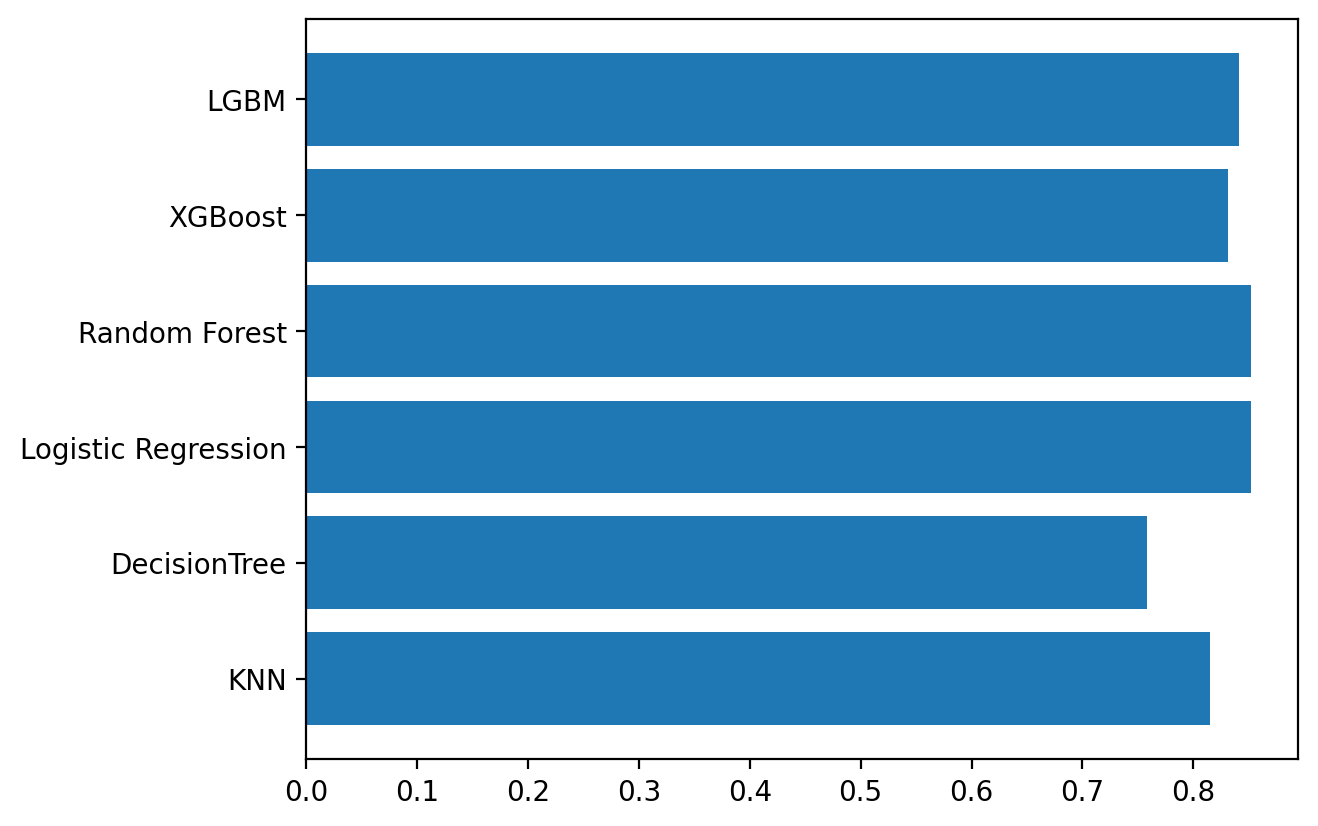

In [143]:
# 성능 시각화 비교
plt.barh(list(result), result.values())
plt.show()

# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 Random Forest 모델 성능을 튜닝합니다.

In [145]:
# 기본 모델 선언
model = RandomForestClassifier()

# 파라미터 지정
  # max_depth: range(1, 21)
params = {'max_depth': range(1,21)}

# 모델 선언

model = GridSearchCV(model , 
                    params,
                    cv=5, 
                    scoring='accuracy')




In [147]:
# 학습하기(많은 시간이 소요될 수 있음)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 21)}, scoring='accuracy')

In [150]:
# 최적 파라미터, 예측 최고 성능

print('최적 파라미터:', model.best_params_)
print('예측 최고성능:', model.best_score_)

최적 파라미터: {'max_depth': 18}
예측 최고성능: 0.8566295979469633


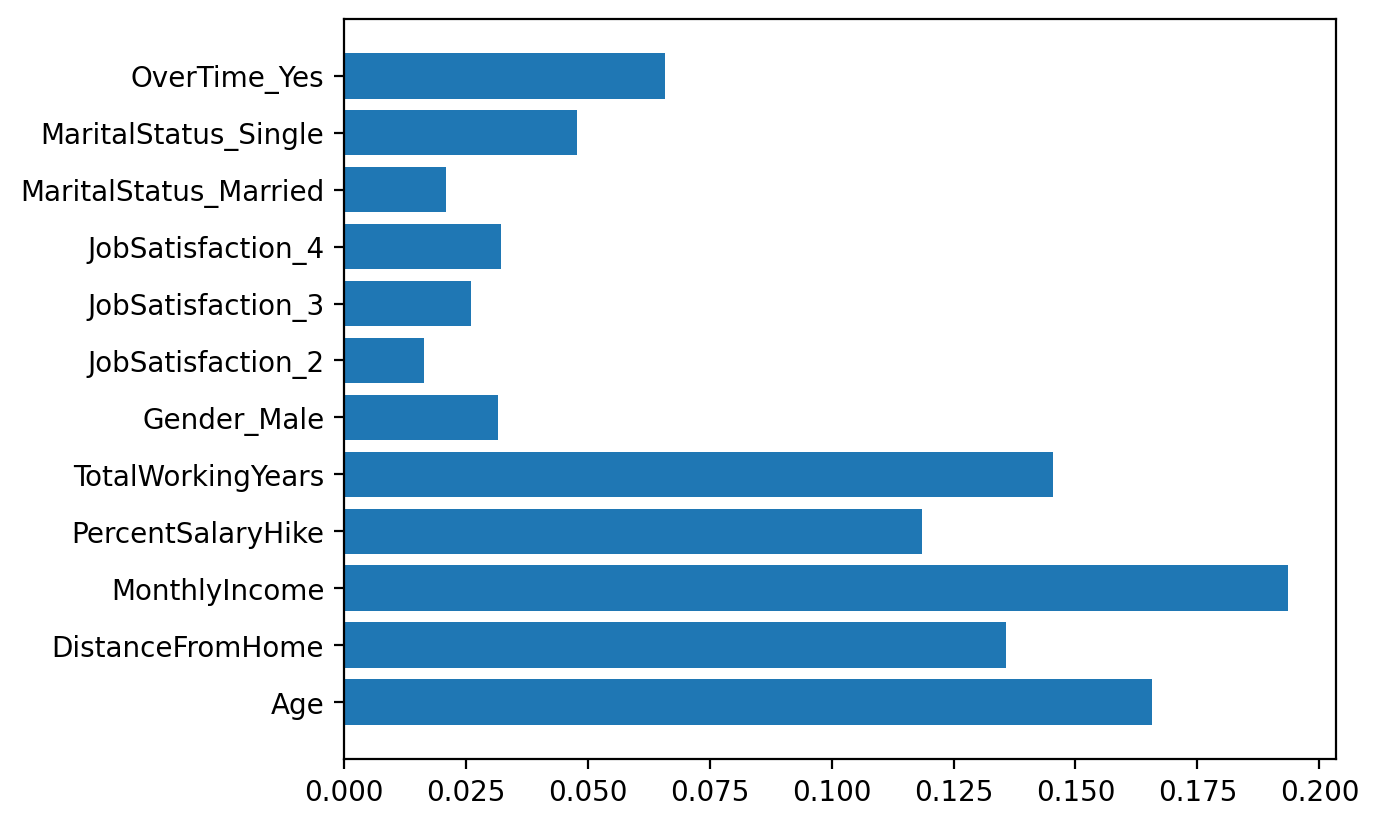

In [155]:
# 변수 중요도 시각화

plt.barh (list(x),model.best_estimator_.feature_importances_)
plt.show()

# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [164]:
# 예측하기
y_pred = model.predict(x_test)

In [168]:
# 성능평가
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[286  14]
 [ 45  14]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       300
           1       0.50      0.24      0.32        59

    accuracy                           0.84       359
   macro avg       0.68      0.60      0.61       359
weighted avg       0.80      0.84      0.81       359

